In [1]:
import stlearn as st
import scanpy as sc
import numpy as np

/mnt/gmi-l1/_90.User_Data/revolvefire/mambaforge/envs/stlearn/lib/python3.8/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [2]:
adata = st.ReadXenium(feature_cell_matrix_file="/data/_90.User_Data/revolvefire/Jupyter/Xenium/output-XETG00081__0010603__1_1__20230807__024154/cell_feature_matrix.h5",
                     cell_summary_file="/data/_90.User_Data/revolvefire/Jupyter/Xenium/output-XETG00081__0010603__1_1__20230807__024154/cells.csv.gz",
                     library_id="PD4_1",
                     image_path="/data/_90.User_Data/revolvefire/Jupyter/Xenium/PD4_1_3-1.png",
                     scale=1,
                     spot_diameter_fullres=15 # Recommend
                     )

Added tissue image to the object!


In [3]:
adata

AnnData object with n_obs × n_vars = 30135 × 297
    obs: 'imagecol', 'imagerow'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
sc.pp.filter_genes(adata, min_counts=1)
sc.pp.filter_cells(adata,min_counts=1)

In [5]:
adata.raw = adata

In [6]:
sc.pp.normalize_total(adata)

In [7]:
st.pp.log1p(adata)

Log transformation step is finished in adata.X


In [8]:
adata

AnnData object with n_obs × n_vars = 29980 × 297
    obs: 'imagecol', 'imagerow', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [9]:
# Run PCA
st.em.run_pca(adata,n_comps=50,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


In [10]:
# Compute neighborhood graph of cells using the PCA representation
st.pp.neighbors(adata,n_neighbors=25,use_rep='X_pca',random_state=0)

/mnt/gmi-l1/_90.User_Data/revolvefire/mambaforge/envs/stlearn/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/gmi-l1/_90.User_Data/revolvefire/mambaforge/envs/stlearn/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/gmi-l1/_90.Us

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [11]:
sc.tl.leiden(adata)

In [12]:
adata

AnnData object with n_obs × n_vars = 29980 × 297
    obs: 'imagecol', 'imagerow', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial', 'log1p', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [13]:
import matplotlib.pyplot as plt

In [14]:
sc.tl.umap(adata)

In [15]:
sc.tl.leiden(adata, resolution=0.8)

/mnt/gmi-l1/_90.User_Data/revolvefire/mambaforge/envs/stlearn/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


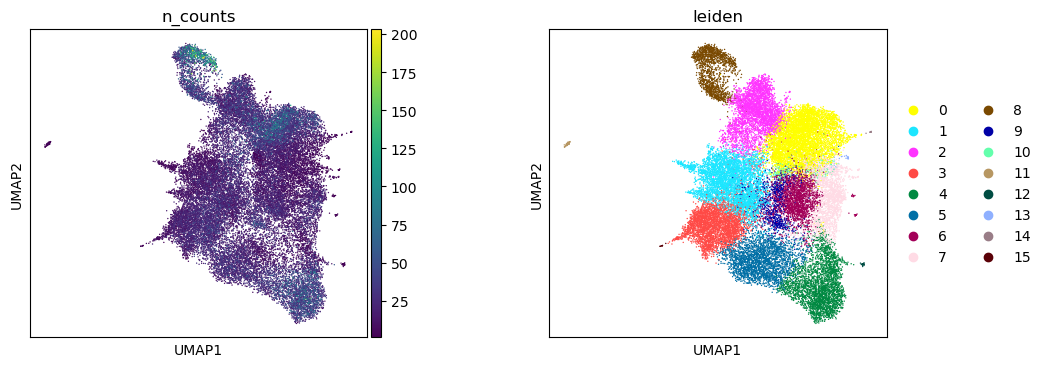

In [16]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["n_counts", "leiden"], palette=sc.pl.palettes.default_102, wspace=0.4)

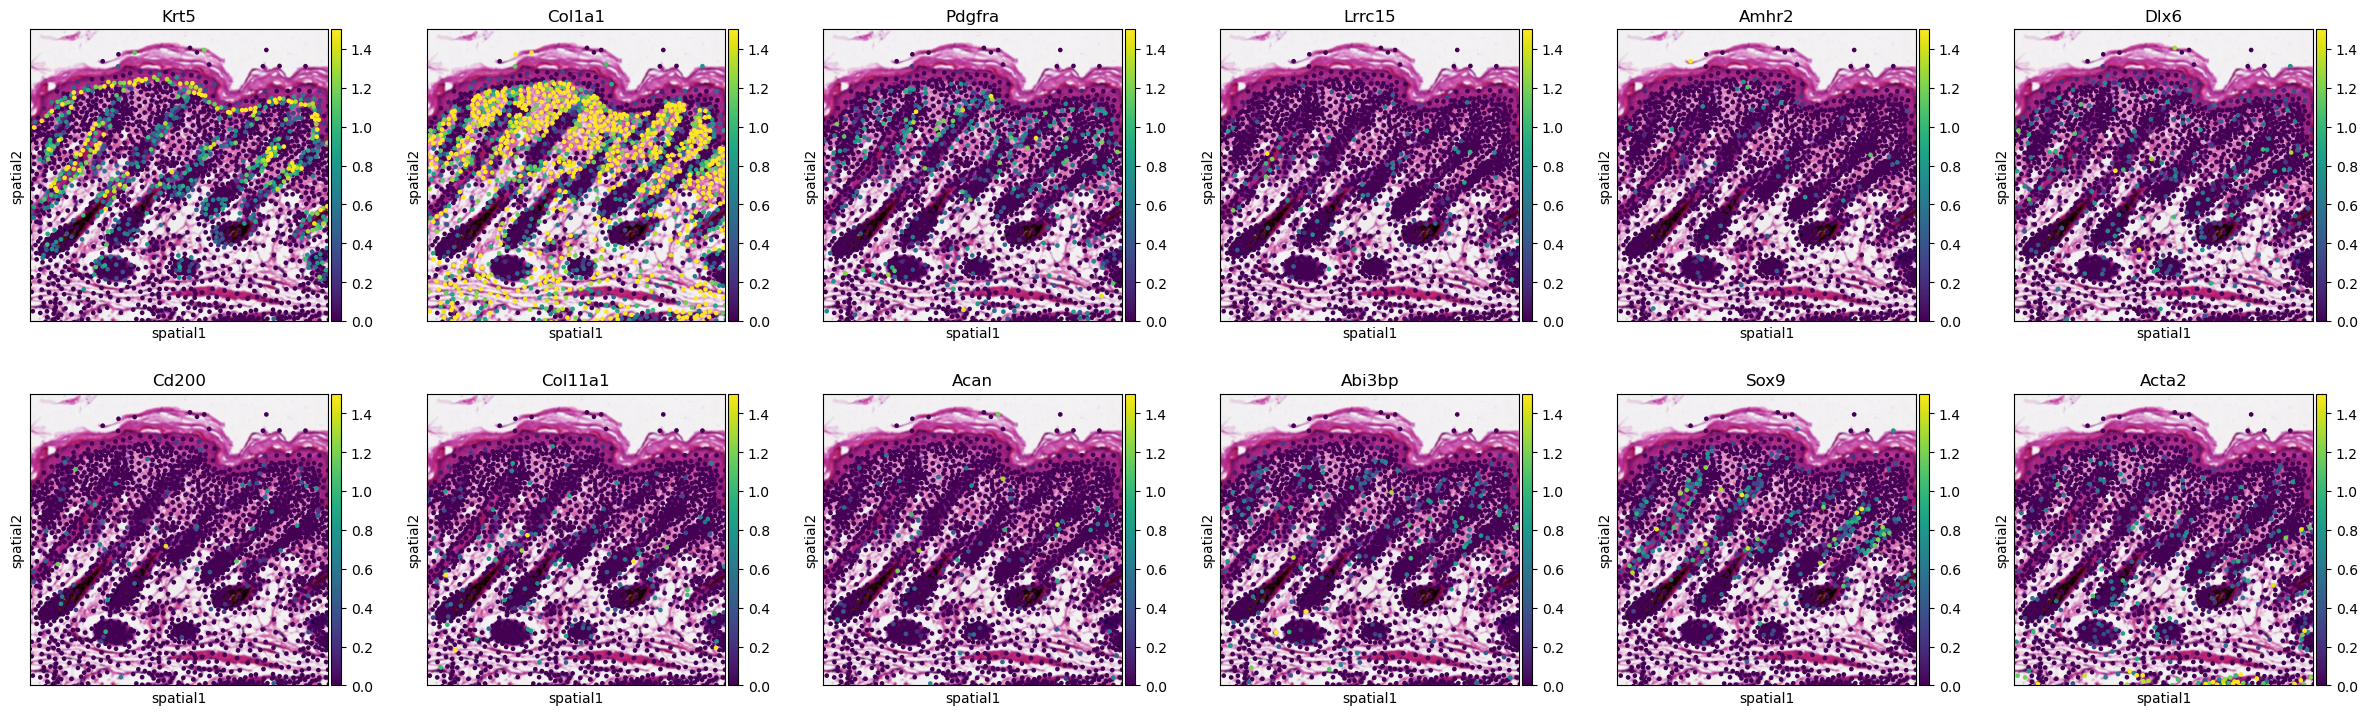

In [19]:
sc.pl.spatial(adata, color=["Krt5", "Col1a1", "Pdgfra", "Lrrc15", "Amhr2", "Dlx6", "Cd200","Col11a1", "Acan", "Abi3bp", "Sox9", "Acta2"], alpha=1.0, crop_coord=[2532,2020,1750,1250], spot_size=8, vmax=1.5, ncols=6, save="multipanel.png")